In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data = datasets.fetch_california_housing() #加利福尼亚房价数据集
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2,random_state =20)

test_size：float or int, default=None
测试集的大小，如果是小数的话，值在（0,1）之间，表示测试集所占有的比例.如果是整数，表示的是测试集的具体样本数；
如果train_size也是None的话，会有一个默认值0.25

train_size：float or int, default=None
和test_size一样，同上

random_state：int or RandomState instance, default=None
这个参数表示随机状态，因为每次分割都是随机的.

shuffle: bool, default=True
是否重洗数据（洗牌），就是说在分割数据前，是否把数据打散重新排序这样子，看上面我们分割完的数据，都不是原始数据集的顺序，默认是要重洗的

In [2]:
st = StandardScaler()
st.fit(x_train)
x_train = st.transform(x_train)
x_test = st.transform(x_test)

![](20210218093055105.png)

In [3]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
print("系数：\n",regr.coef_)
print("截距：\n",regr.intercept_)
print("决定系数(越接近一意味着模型的线性程度越好，如果为负数，那就意味着跟瞎jb猜差距不大)：\n",r2_score(y_test,y_pred))


系数：
 [ 0.83275185  0.1173856  -0.27597663  0.29900186 -0.00795271 -0.03963673
 -0.88241635 -0.85338011]
截距：
 2.0678235537788865
决定系数(越接近一意味着模型的线性程度越好，如果为负数，那就意味着跟瞎jb猜差距不大)：
 0.6121654293404898


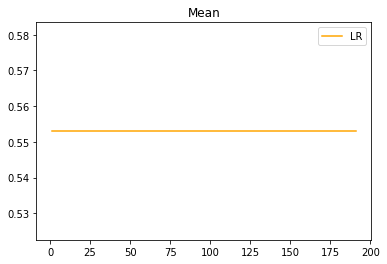

In [4]:


alpha = np.arange(1,201,10)

lr = []
for a in alpha:
    linear = linear_model.LinearRegression()
    linears = cross_val_score(linear,data.data,data.target,cv = 5,scoring = "r2").mean();
    lr.append(linears)

plt.plot(alpha,lr,color="orange",label="LR")
plt.title("Mean")
plt.legend()
plt.show()
#这里是进行全局交叉验证得到的R方值.和上面的那个根据部分数据得到的R方意义不同

https://blog.csdn.net/HiWangWenBing/article/details/124413449
这篇文章给出了数学解释和用法

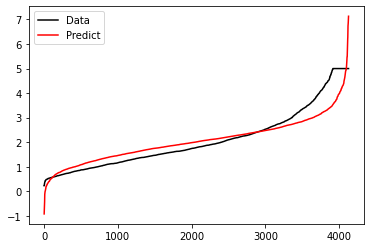

In [5]:
plt.plot(range(len(y_test)),sorted(y_test),c="black",label= "Data")
plt.plot(range(len(y_pred)),sorted(y_pred),c="red",label = "Predict")
plt.legend()
plt.show()
#这个是根据训练集得到的模型做出的预测与真正的测试集的比较图，可以看到这拟合的是个锤子